Created to help students with Exploratory Data Analysis

**EDA** – knowing your data  -- gaining certain amount of familiarity of your dataset.

Before doing EDA, we should have these questions.

1.	What do you want to achieve from this dataset?
2.	What is your data and its different types?
3.	Is there any outlier in your data?
4.	Check and treat missing values.
5.	How to get more out of our data?


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

As we are concentrating on EDA, I am reading only the train dataset.

In [ ]:
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.shape

We have 1460 records with 81 columns.

In [ ]:
data.columns

In [ ]:
data.dtypes.value_counts()

In [ ]:
missing = data.isnull()

In [ ]:
missing

In [ ]:
missing = data.isnull().sum()

missing

In [ ]:
missing[missing>0]

In [ ]:
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

It is very evident from the plot that some columns like PoolQuality, Misc Feature, Alley have lot of missing values

In [ ]:
data['SalePrice'].describe()

Observation : 

### Histogram

In [ ]:
sns.set(rc={'figure.figsize' : (12,8)})
sns.displot(data['SalePrice'], kde=False, bins=20);

In [ ]:
sns.kdeplot(data['SalePrice'])

In [ ]:
data['SalePrice'].describe()

### Scatter Plot

In [ ]:
sns.scatterplot(x='GarageCars', y='SalePrice', data=data)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(18,10))

sns.regplot(x='OverallQual', y='SalePrice', data=data, scatter=True, fit_reg= True, ax=ax1)

sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x='GarageArea', y='SalePrice', data=data, scatter=True, fit_reg= True, ax=ax3)

sns.regplot(x='FullBath', y='SalePrice', data=data, scatter=True, fit_reg= True, ax=ax4)

sns.regplot(x='YearBuilt', y='SalePrice', data=data, scatter=True, fit_reg= True, ax=ax5)

sns.regplot(x='WoodDeckSF', y='SalePrice', data=data, scatter=True, fit_reg= True, ax=ax6)

### Correlation

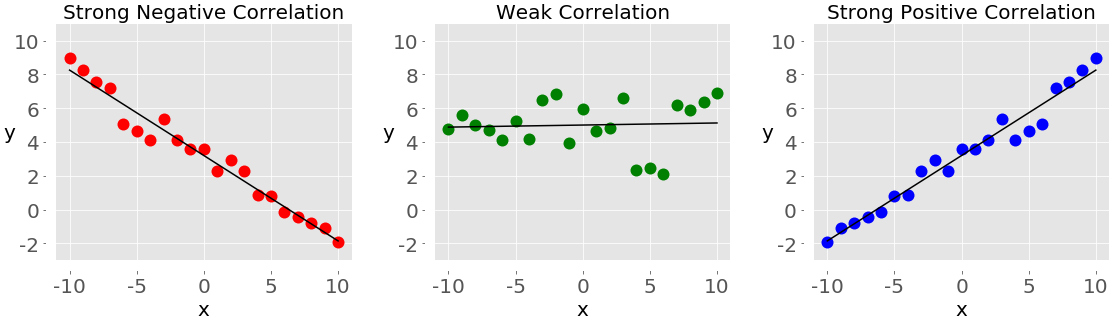

In [ ]:
numeric_features = data.select_dtypes(include = [np.number])
numeric_features.columns

In [ ]:
numeric_features1 = data.select_dtypes(exclude = ['O'])
numeric_features1.columns

In [ ]:
numeric_features.shape, numeric_features1.shape

In [ ]:
categorical_features = data.select_dtypes(include = [np.object])
categorical_features.columns

In [ ]:
categorical_features.shape

In [ ]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False), '\n')

In [ ]:
f, ax = plt.subplots(figsize = (14, 12))
plt.title('Correlation of Numeric Features with Sale Price')
sns.heatmap(correlation, square=True, vmax=0.8)

In [ ]:
k=11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)

For two matrices, corr() returns the pairwise correlation between the columns of the two matrices if that is what you want. If you input two matrices into corrcoef(), it converts the matrices to column vectors first and then just computes the correlation coefficient between those two vectors.

In [ ]:
#helps to remove multicollinearity
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor='white', xticklabels=cols.values, yticklabels=cols.values)

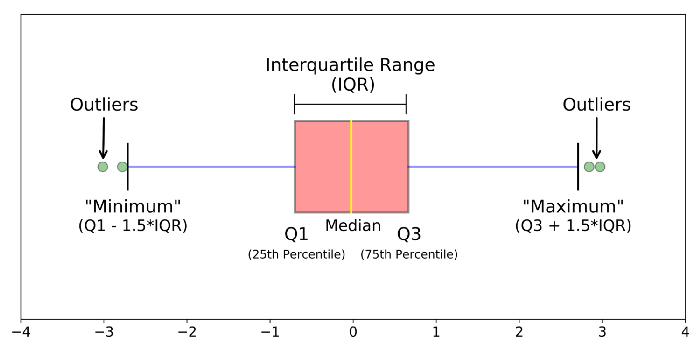

In [ ]:
sns.boxplot(data['SalePrice'])

In [ ]:
f, ax = plt.subplots(figsize = (16,10))
fig = sns.boxplot(x='SaleType', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
xt = plt.xticks(rotation = 45)

In [ ]:
data['SaleType'].unique()

In [ ]:
data['SaleType'].nunique()

In [ ]:
data['SaleType'].value_counts()

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)


In [ ]:
data['OverallQual'].value_counts()

### Removing Outliers

In [ ]:
data['SalePrice'].describe()

In [ ]:
sns.boxplot(data['SalePrice'])

In [ ]:
data.shape

In [ ]:
first_quartile = data['SalePrice'].quantile(.25)
#second_quartile = data['SalePrice'].quantile(.25)
third_quartile = data['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [ ]:
new_boundary = third_quartile + 3*IQR

In [ ]:
data.drop(data[data['SalePrice'] > new_boundary].index, axis=0, inplace=True)

In [ ]:
data.shape

In [ ]:
sns.boxplot(data['SalePrice'])

In [ ]:
data['SalePrice'].describe()

### Removing Bad Features
* remove multicollinear
* features with more missing values
* features with poor correlation

In [ ]:
x = correlation['SalePrice'].sort_values(ascending = False)

In [ ]:
L = list(x[x < 0.5].index)

In [ ]:
L

In [ ]:
data.drop (L, axis =1, inplace=True)

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
cols = data.columns
for c in cols:
  tv = 100 - data[c].count()*100/len(data)
  if tv > 80:
    print(c, tv)

In [ ]:
data.drop(['Alley', 'PoolQC'], axis=1, inplace=True)

In [ ]:
data.fillna(-9999)

In [ ]:
data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
import pandas_profiling as pp


In [ ]:
pp.ProfileReport(data)
